In [60]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread

In [61]:
data_path = "../input/files1/Malaria Cells"

In [62]:
# to confirm that the directory has test and train dirs

os.listdir(data_path)

['training_set', 'single_prediction', 'testing_set']

In [63]:
train_path = data_path+'/training_set'
test_path = data_path+'/testing_set'

In [64]:
os.listdir(train_path), os.listdir(test_path)

(['Uninfected', 'Parasitized'], ['Uninfected', 'Parasitized'])

# Image of a Parasitized Cell

(<matplotlib.image.AxesImage at 0x7fb89c793bd0>, (148, 142, 3))

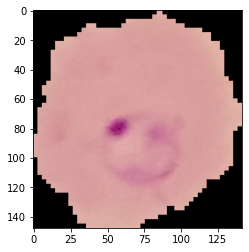

In [65]:

img1=imread(train_path+'/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_162.png')
plt.imshow(img1),img1.shape

# Image of a Uninfected Cell

(<matplotlib.image.AxesImage at 0x7fb89c686350>, (136, 145, 3))

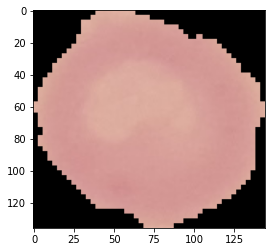

In [66]:

img2=imread(train_path+'/Uninfected/C100P61ThinF_IMG_20150918_144104_cell_131.png')
plt.imshow(img2),img2.shape

# To know the number of images in each dir

In [67]:
print(len(os.listdir(train_path+'/Parasitized')))
print(len(os.listdir(train_path+'/Uninfected')))


13780
13780


# ImageDatagenerator

In [68]:
from keras.preprocessing.image import ImageDataGenerator

In [69]:
data_gen = ImageDataGenerator(rescale=1/255,
                             rotation_range=20,
                             width_shift_range=0.1,
                             height_shift_range=0.1,
                             shear_range=0.1,
                             zoom_range=0.1,
                             horizontal_flip=True,
                             fill_mode='nearest')

# Plotting a Transformed Image

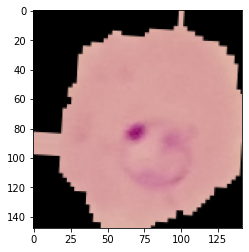

In [70]:
plt.imshow(data_gen.random_transform(img1))

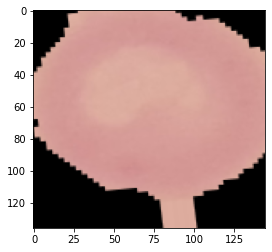

In [71]:
plt.imshow(data_gen.random_transform(img2))

# Generating the images from the Directory

In [81]:
train_generator=data_gen.flow_from_directory(train_path,
                                             target_size=(130, 130),
                                             color_mode="rgb",
                                             batch_size=16,
                                             class_mode="binary",
                                             shuffle=True,
                                             seed=42)

Found 27558 images belonging to 2 classes.


In [82]:
validation_generator=data_gen.flow_from_directory(test_path,
                                                  target_size=(130, 130),
                                                  color_mode="rgb",
                                                  batch_size=16,
                                                  class_mode="binary",
                                                  shuffle=True,
                                                  seed=42)

Found 15832 images belonging to 2 classes.


In [74]:
train_generator.class_indices

{'Parasitized': 0, 'Uninfected': 1}

# Creating a Model

In [75]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Flatten, Dense, Dropout
from keras.optimizers import SGD

opt = SGD(lr=0.01)

import warnings
warnings.filterwarnings('ignore')

In [76]:
image_shape=(130,130,3)

In [84]:
model=Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=image_shape,activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=image_shape,activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=image_shape,activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [85]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 128, 128, 32)      896       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 64, 64, 32)        0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 62, 62, 64)        18496     
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 31, 31, 64)        0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 29, 29, 64)       

# Callbacks - EarlyStopping

In [87]:
from keras.callbacks import Callback

class myCallback(Callback):
  def on_epoch_end(self,epoch,logs={}):
    if(logs.get('loss')>0.05):
      print("\nReached accuracy so cancelling training")
      self.model.stop_training=True

callbacks=myCallback()

# Training the Model

In [89]:
results = model.fit_generator(train_generator,
                             epochs=10,
                             validation_data = validation_generator
                             )

Epoch 1/10
1723/1723 [==============================] - 219s 127ms/step - loss: 0.1808 - accuracy: 0.9436 - val_loss: 0.1737 - val_accuracy: 0.9432
Epoch 2/10
1723/1723 [==============================] - 221s 128ms/step - loss: 0.1697 - accuracy: 0.9467 - val_loss: 0.1660 - val_accuracy: 0.9430
Epoch 3/10
1723/1723 [==============================] - 221s 128ms/step - loss: 0.1655 - accuracy: 0.9463 - val_loss: 0.1556 - val_accuracy: 0.9464
Epoch 4/10
1723/1723 [==============================] - 221s 128ms/step - loss: 0.1651 - accuracy: 0.9485 - val_loss: 0.1640 - val_accuracy: 0.9462
Epoch 5/10
1723/1723 [==============================] - 222s 129ms/step - loss: 0.1579 - accuracy: 0.9503 - val_loss: 0.1605 - val_accuracy: 0.9456
Epoch 6/10
1723/1723 [==============================] - 221s 129ms/step - loss: 0.1548 - accuracy: 0.9514 - val_loss: 0.1608 - val_accuracy: 0.9449
Epoch 7/10
1723/1723 [==============================] - 221s 128ms/step - loss: 0.1594 - accuracy: 0.9493 - val_

# Plotting the Results

In [92]:
metrics = results.history

metrics = pd.DataFrame(metrics)
metrics.head()

,loss,accuracy,val_loss,val_accuracy
0,0.180767,0.943646,0.173709,0.943216
1,0.169726,0.946658,0.166010,0.942964
2,0.165504,0.946259,0.155576,0.946438
3,0.165065,0.948509,0.163953,0.946248
4,0.157948,0.950287,0.160471,0.945616


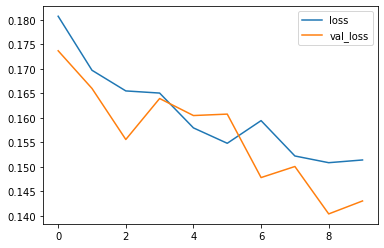

In [93]:
metrics[['loss','val_loss']].plot()

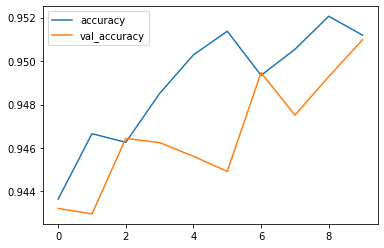

In [95]:
metrics[['accuracy','val_accuracy']].plot()

# Saving the Model

In [ ]:
model.save('malaria_classifier.h5')